# Euroscipy 2018
## Data Visualizations with Altair

In [1]:
import altair as alt
import pandas as pd

### Example Dataset - Twitter followers of @EuroSciPy

In [2]:
profiles = pd.read_csv('data/euroscipy_followers.csv', index_col=False)

In [3]:
profiles[:10]

,created_at,days_registered,favourites_count,followers_count,friends_count,listed_count,name,screen_name,statuses_count
0,2009-06-21 20:13:18+00:00,3353,39830,122146,133485,3758,Randy Olson,randal_olson,18396
1,2007-01-05 00:37:53+00:00,4251,2412,95972,8361,488,Tarek Amr,gr33ndata,62475
2,2015-02-04 22:35:11+00:00,1299,13337,42112,17917,1964,Open Data Science,odsc,32936
3,2012-08-11 03:23:37+00:00,2206,1631,30851,564,956,PyData,PyData,5709
4,2011-10-25 15:18:43+00:00,2497,6130,29473,2415,1218,Anaconda,anacondainc,8003
5,2015-01-26 03:21:16+00:00,1308,1816,27561,101,689,Full Stack Python,fullstackpython,3714
6,2008-08-31 14:51:19+00:00,3647,2759,24151,2087,1321,Olivier Grisel,ogrisel,12619
7,2009-04-17 20:04:57+00:00,3418,1629,19962,493,776,Travis Oliphant,teoliphant,4006
8,2010-02-08 07:01:42+00:00,3121,1080,19642,22338,247,Jiralma,jirallumin,57281
9,2014-12-19 00:44:24+00:00,1346,48,19033,24941,227,ICO Exchange,ICOexchange,976


### Bar Chart - number of followers

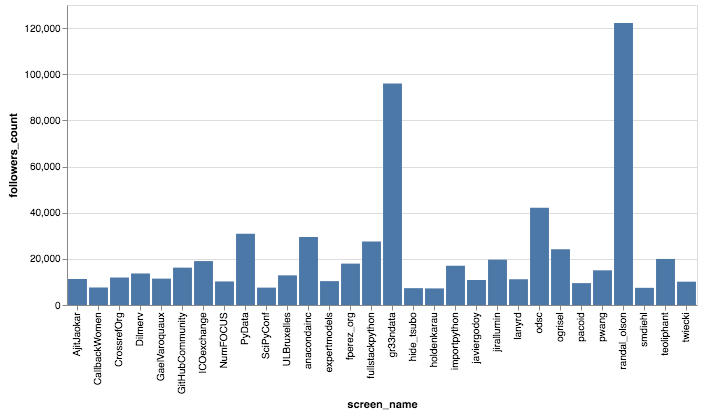

In [4]:
alt.Chart(profiles[:30]).mark_bar().encode(
    x='screen_name',
    y='followers_count',
)

**Encodings**: It's possible to map our data to other visual properties than just the x- and y-value, for example `color`.

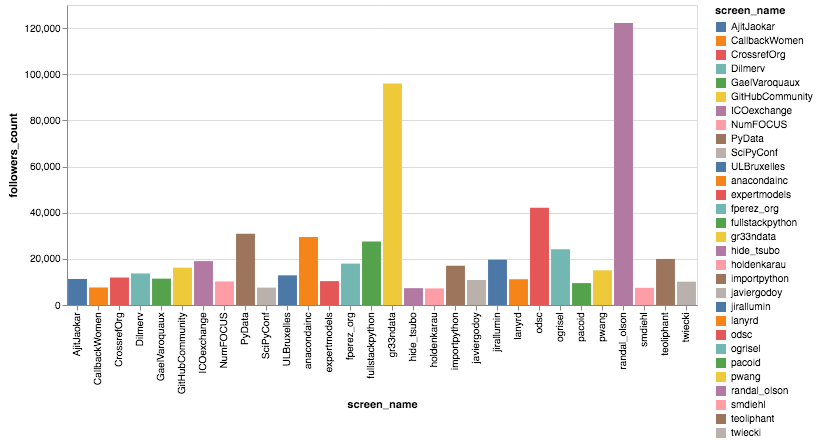

In [5]:
alt.Chart(profiles[:30]).mark_bar().encode(
    x='screen_name',
    y='followers_count',
    color='screen_name'
)

In [6]:
df = profiles[100:1000].sample(n=100)

### Scatter plots with different marks

#### Point mark

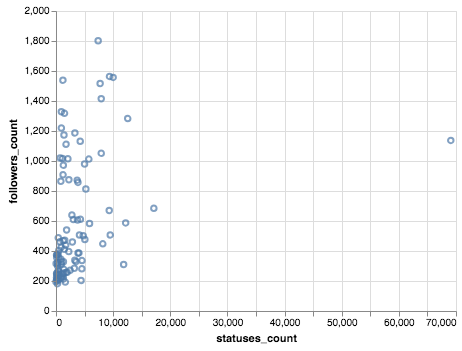

In [7]:
tweets_chart = alt.Chart(df).mark_point().encode(
    x='statuses_count',
    y='followers_count',
)
tweets_chart

#### Circle mark

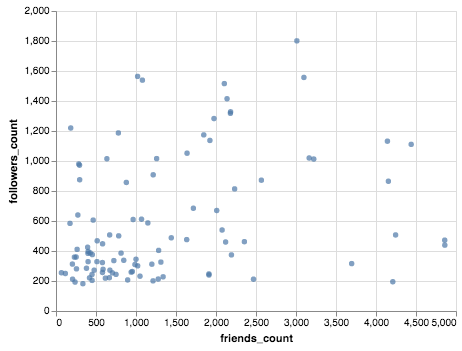

In [8]:
friends_chart = alt.Chart(df).mark_circle().encode(
    x='friends_count',
    y='followers_count',
)
friends_chart

#### Square mark

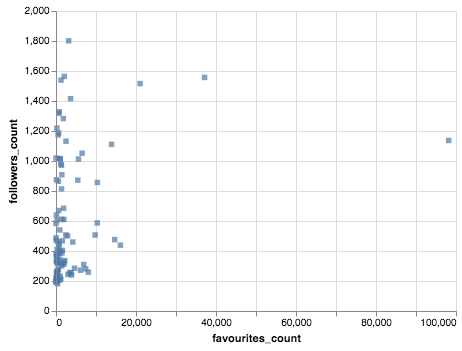

In [9]:
favourites_chart = alt.Chart(df).mark_square().encode(
    x='favourites_count',
    y='followers_count',
)
favourites_chart

#### Mark with additional transparency property

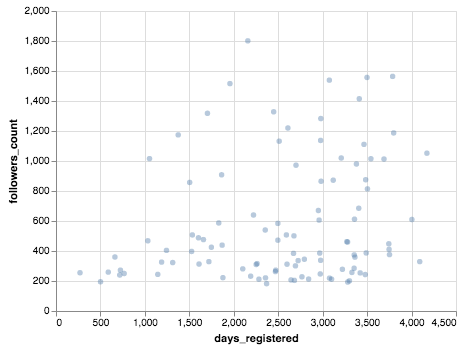

In [10]:
days_registered_chart = alt.Chart(df).mark_circle(opacity=0.4).encode(
    x='days_registered',
    y='followers_count',
)
days_registered_chart

### Tooltips

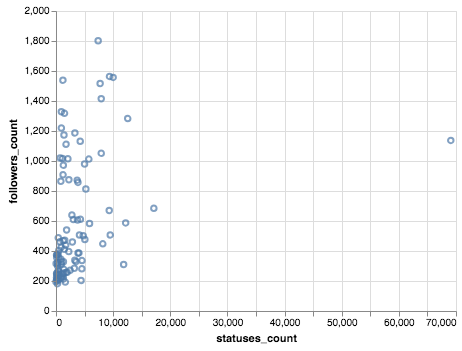

In [11]:
tweets_chart.encode(
    tooltip=['screen_name', 'followers_count']
)

### Interactivity

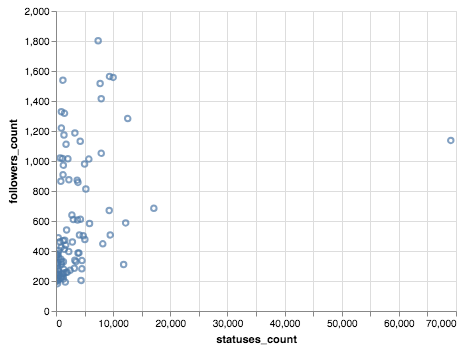

In [12]:
tweets_chart.encode(
    tooltip=['screen_name']
).interactive()

### Compounded Charts
#### Horizontal and vertical concatenation

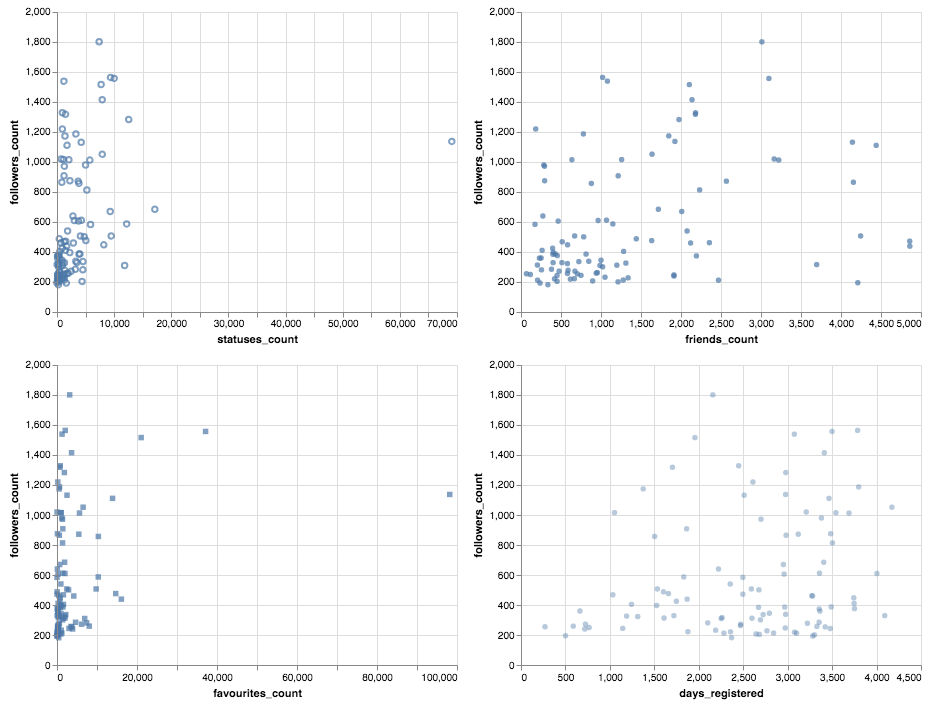

In [13]:
vc = alt.vconcat(alt.hconcat(tweets_chart, friends_chart), alt.hconcat(favourites_chart, days_registered_chart))
# could also be written as
# vc = (tweets_chart | following_chart) & (favourites_chart | days_registered_chart)
vc

### Selections
#### Example: Linked-Brush

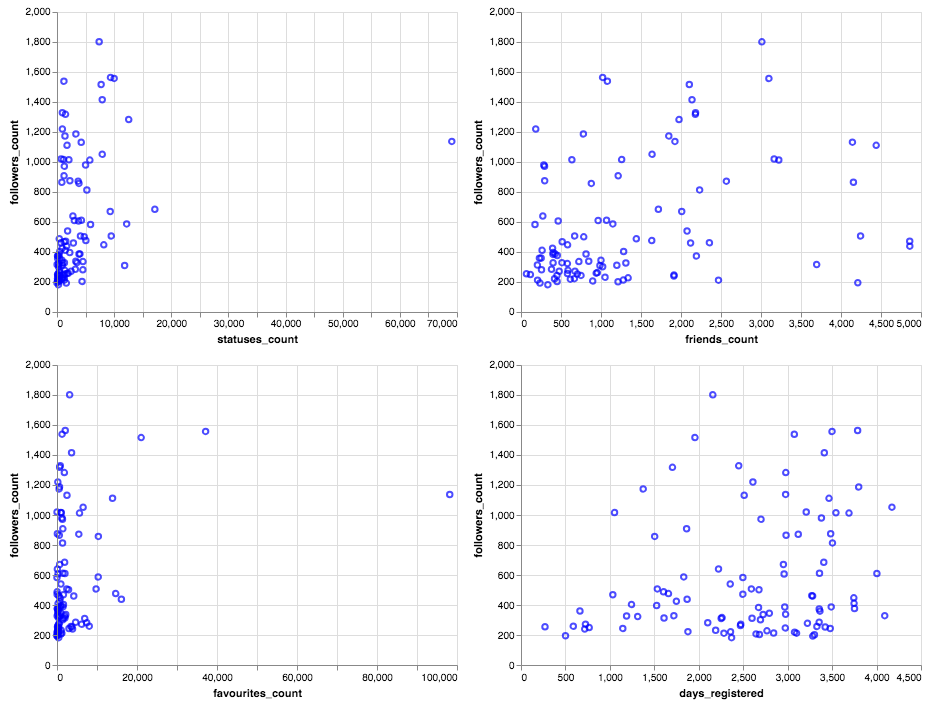

In [14]:
brush = alt.selection(type='interval', resolve='global')

base = alt.Chart(df).mark_point().encode(
    y='followers_count',
    # if point is in selected area, use color 'blue', 'gray' otherwise
    color=alt.condition(brush, alt.ColorValue('blue'), alt.ColorValue('gray')),
    tooltip=['screen_name'],
).add_selection(brush)

(base.encode(x='statuses_count') | base.encode(x='friends_count')) & (base.encode(x='favourites_count') | base.encode(x='days_registered'))

#### Example: Interval selection bound to chart scales

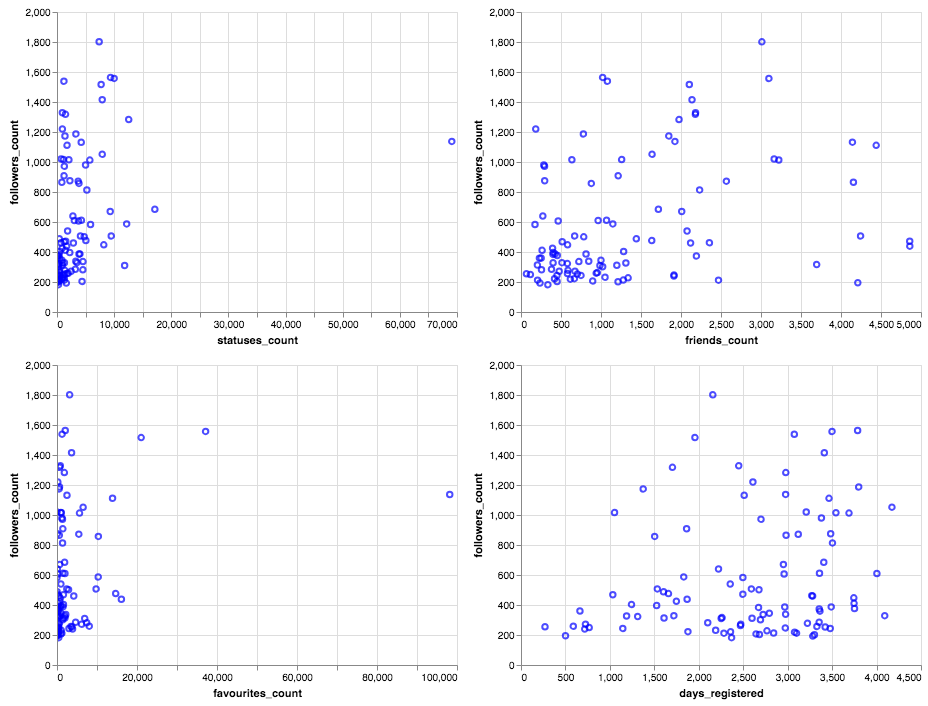

In [15]:
brush = alt.selection(type='interval', resolve='global', bind='scales')

base = alt.Chart(df).mark_point().encode(
    y='followers_count',
    # if point is in selected area, use color 'blue', 'gray' otherwise
    color=alt.condition(brush, alt.ColorValue('blue'), alt.ColorValue('gray')),
    tooltip=['screen_name'],
).add_selection(brush)

(base.encode(x='statuses_count') | base.encode(x='friends_count')) & (base.encode(x='favourites_count') | base.encode(x='days_registered'))

### Creating Altair chart objects from Vega(-Lite) spec

In [16]:
chart = alt.Chart.from_json(vc.to_json(indent=2))

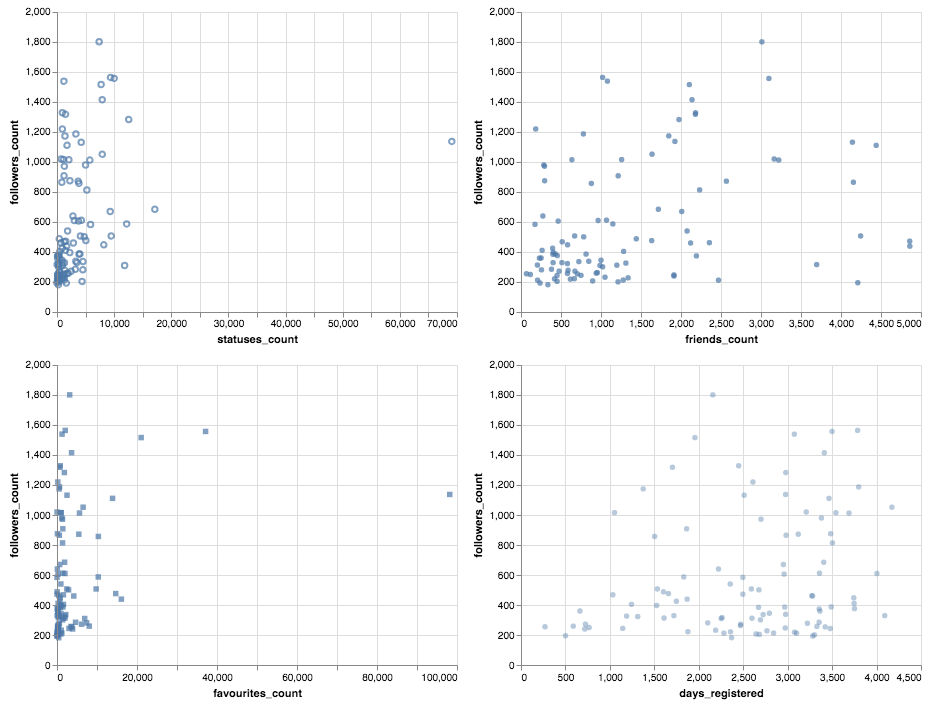

In [17]:
chart